<a href="https://colab.research.google.com/github/tabaraei/CheatSheet/blob/master/notebooks/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Load and explore the data

## 1-1- Load the dataset:

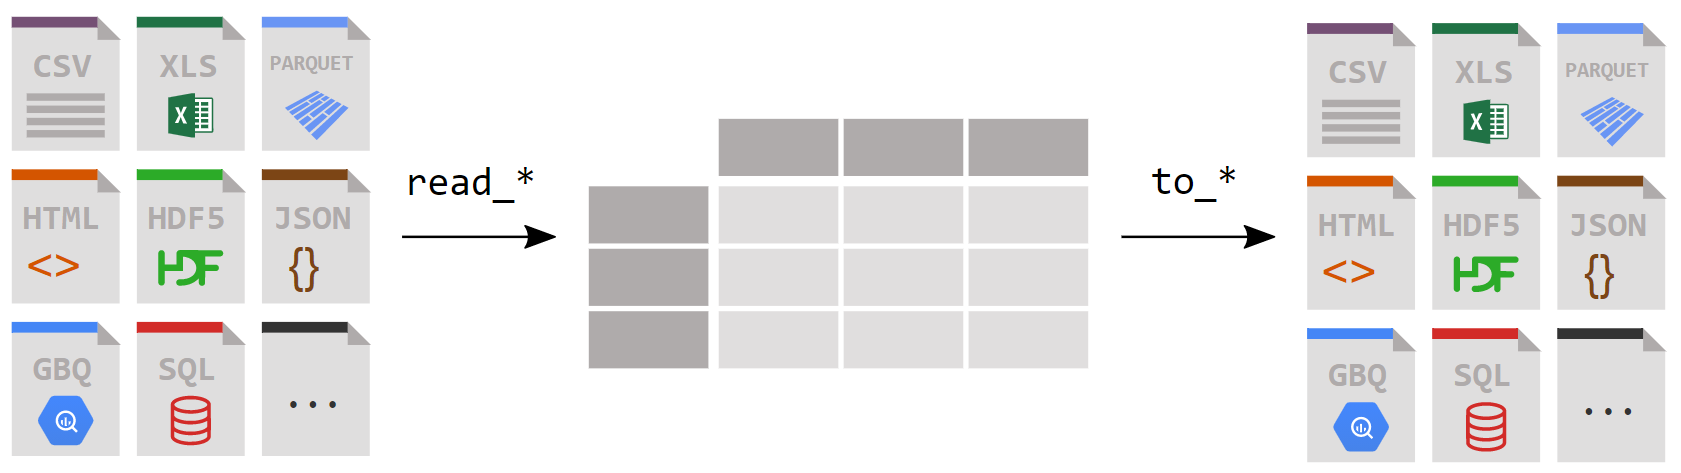

**Note:**
1. use `encoding="utf-8-sig"` for Persian texts
2. use `index=False` to ignore indexes while saving the data

In [1]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1-2- Attributes of the dataset:

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.empty

False

In [5]:
df.shape

(891, 15)

In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
        'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
        'alive', 'alone'],
       dtype='object')]

In [9]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']

In [10]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 1-3- Renaming dataframe headers:

In [12]:
df.rename(columns = str.upper).head()

,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.rename(columns={
    'survived': 'col1',
    'pclass': 'col2',
    'sex': 'col3'
}).head()

,col1,col2,col3,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1-4- Statistics of the dataset:

### 1-4-1- Single column statistics:

In [14]:
print(df['age'].count())
print(df['age'].sum())
print(df['age'].iloc[:5].prod())
print(df['age'].mean())
print(df['age'].median())
print(df['age'].mode()[0])
print(df['age'].std())
print(df['age'].var())

714
21205.17
26626600.0
29.69911764705882
28.0
24.0
14.526497332334044
211.0191247463081


In [15]:
print(df['age'].quantile(.25))
print(df['age'].quantile())
print(df['age'].quantile(.75))

20.125
28.0
38.0


In [16]:
print(df['age'].min())
print(df['age'].max())

0.42
80.0


In [17]:
df['age'].abs().head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [18]:
df['age'].cumsum().head()

0     22.0
1     60.0
2     86.0
3    121.0
4    156.0
Name: age, dtype: float64

In [19]:
df['age'].cumprod().head()

0          22.0
1         836.0
2       21736.0
3      760760.0
4    26626600.0
Name: age, dtype: float64

In [20]:
df['age'].cummax().head()

0    22.0
1    38.0
2    38.0
3    38.0
4    38.0
Name: age, dtype: float64

In [21]:
df['age'].cummin().head()

0    22.0
1    22.0
2    22.0
3    22.0
4    22.0
Name: age, dtype: float64

In [22]:
((df['age'] - df['age'].mean()) / df['age'].std()).head()

0   -0.530005
1    0.571430
2   -0.254646
3    0.364911
4    0.364911
Name: age, dtype: float64

In [23]:
df['fare'].round(decimals=3).head()

0     7.250
1    71.283
2     7.925
3    53.100
4     8.050
Name: fare, dtype: float64

In [24]:
# percentage of each class, sorted by highest to lowest
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

### 1-4-2- Multiple columns statistics:

In [25]:
df[["age", "fare"]].median()

age     28.0000
fare    14.4542
dtype: float64

In [26]:
df.agg({
  "age": ["min", "max", "median", "skew"],
  "fare": ["min", "max", "median", "mean"],
})

,age,fare
max,80.000000,512.329200
mean,NaN,32.204208
median,28.000000,14.454200
min,0.420000,0.000000
skew,0.389108,NaN


In [27]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2- Handling Missing Data:

In [28]:
df.shape,  df[df['age'].notna()].shape

((891, 15), (714, 15))

In [30]:
# --- select dataframe where no missing value exists in the columns
cols = [col for col in df.columns if not df[col].isnull().sum()]
df[cols]

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


# 3- Data Selection:

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
df[['age', 'embarked', 'class']].head()

In [ ]:
condition1 = df['age'] != 35
condition2 = df['pclass'].isin([1,3])
condition3 = df['adult_male']

condition = (condition1 & condition2) | condition3
df[condition].head()

In [ ]:
df.loc[10:15, ['age', 'class']]

In [ ]:
df.loc[df['age']>25, ['age', 'class']].head()

In [ ]:
df.iloc[0:5, 2:8].head()

In [ ]:
col_index = df.columns.get_loc('age')
df.iloc[0:5, col_index]

In [ ]:
df.loc[df.groupby('embark_town')['age'].transform(max) > 72]

# 4- Data Modification:

In [ ]:
df_copy = df.copy()
df_copy['dummy'] = df_copy['age'] * 1.2
df_copy.head()

In [ ]:
df_copy = df.copy()
df_copy.loc[0:2, 'sex'] = "unknown"
df_copy.head()

# 5- Data Visualization:

In [ ]:
df.plot()

In [ ]:
df['age'].plot()

In [ ]:
[method_name for method_name in dir(df.plot) if not method_name.startswith("_")]

In [ ]:
df.plot.scatter(x="age", y="fare", alpha=0.2)

In [ ]:
_ = df.plot.box(figsize=(12, 4), subplots=True)

# Not Organized

In [ ]:
df.corr()
value_counts
drop_duplicates
apply
df.dropna(inplace=True)
df = df.fillna(0)
dropped_df = df.dropna(thresh=int(df.shape[0] * .9), axis=1)
df['PID'] = df['PID'].fillna(df['PID'].mean())
missing_values = ["n/a", "na", "--"]
new_df = pd.read_csv("property_data.csv", na_values = missing_values)

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting